---
# <center> Лабораторна робота №8 </center>
## **Тема. Структура даних граф. Алгоритми на графах**
## **Мета:** засвоїти представлення структури даних граф та основні алгоритми роботи з ними засобами Python.
### _Викoнав Данііл Танасієнко 11.12.24_
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, що надано на самостійну роботу.
### <center> Завдання для самостійної роботи </center>

#### **1)** Для варіанту, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі.

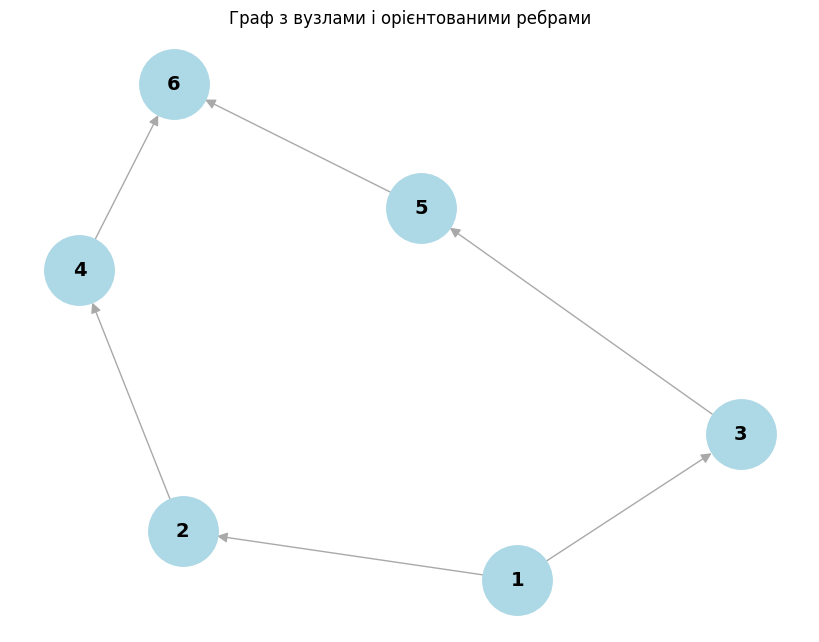

In [4]:
import subprocess
import sys

# Встановлення бібліотек, якщо вони не встановлені
try:
    import networkx as nx
    import matplotlib.pyplot as plt
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx", "matplotlib"])
    import networkx as nx
    import matplotlib.pyplot as plt

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Додаємо орієнтовані ребра між вузлами
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)
])

# Візуалізація графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Фіксований seed для стабільної візуалізації

# Малюємо орієнтований граф з мітками вузлів
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='darkgray', node_size=2500, font_size=14, font_weight='bold', arrowsize=15)

# Показуємо граф
plt.title("Граф з вузлами і орієнтованими ребрами")
plt.show()



#### **2)** Для свого варіанту реалізувати всі алгоритми, згідно з прикладами, наведеними вище.

In [8]:
#Метод Дейкстри
import subprocess
import sys
import heapq
import networkx as nx


try:
    import networkx as nx
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx

def dijkstra(graph, start):
    # Встановлюємо початкові відстані
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    
    # Черга з пріоритетами для вибору мінімальної відстані
    priority_queue = [(0, start)]  # (відстань, вузол)
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # Якщо поточна відстань більша за вже знайдену, пропускаємо
        if current_distance > distances[current_node]:
            continue
        
        # Оновлюємо відстані для сусідів
        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor].get('weight', 1)  # Якщо вага не задана, припускаємо, що вона дорівнює 1
            distance = current_distance + weight
            
            # Якщо знайдений шлях коротший, оновлюємо відстань
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return distances

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Додаємо орієнтовані ребра між вузлами
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)
])

# Запуск алгоритму Дейкстри з вузла 1
start_node = 1
distances = dijkstra(G, start_node)

# Виведення результатів
print(f"Найкоротші шляхи від вузла {start_node}:")
for node, distance in distances.items():
    print(f"До вузла {node}: {distance}")


Найкоротші шляхи від вузла 1:
До вузла 1: 0
До вузла 2: 1
До вузла 3: 1
До вузла 4: 2
До вузла 5: 2
До вузла 6: 3


In [9]:
#Беллмана-Форда:
import subprocess
import sys
import networkx as nx


try:
    import networkx as nx
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx

# Реалізація алгоритму Беллмана-Форда
def bellman_ford(graph, start):
    # Ініціалізуємо відстані до всіх вузлів як "безкінечність", крім стартового, яке дорівнює 0
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    
    # Проходимо по всіх ребрах графа (|V| - 1) разів
    for _ in range(len(graph.nodes) - 1):
        # Для кожного ребра перевіряємо чи можемо оновити відстань
        for u, v, weight in graph.edges(data=True):
            weight = weight.get('weight', 1)  # Якщо вага не вказана, ставимо 1
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
    
    # Перевірка на наявність негативних циклів
    for u, v, weight in graph.edges(data=True):
        weight = weight.get('weight', 1)
        if distances[u] + weight < distances[v]:
            raise ValueError("Граф містить негативний цикл")
    
    return distances

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Додаємо ребра з вагами (орієнтовані)
G.add_edges_from([
    (1, 2, {'weight': 1}), (1, 3, {'weight': 4}), 
    (2, 3, {'weight': 2}), (2, 4, {'weight': 5}),
    (3, 5, {'weight': 1}), (4, 5, {'weight': 2}),
    (5, 6, {'weight': 3})
])

# Запускаємо алгоритм 
start_node = 1
distances = bellman_ford(G, start_node)

# Виводимо результати
print(f"Найкоротші шляхи від вузла {start_node}:")
for node, distance in distances.items():
    print(f"До вузла {node}: {distance}")



Найкоротші шляхи від вузла 1:
До вузла 1: 0
До вузла 2: 1
До вузла 3: 3
До вузла 4: 6
До вузла 5: 4
До вузла 6: 7


In [48]:
#  Пошук в глибину (DFS) за допомогою рекурсії
import subprocess
import sys
import networkx as nx


try:
    import networkx as nx
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx

# Реалізація пошуку в глибину (DFS) за допомогою рекурсії
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()  # Множина для відслідковування відвіданих вузлів
    
    # Відвідуємо поточний вузол
    visited.add(node)
    print(node, end=" ")  # Виводимо вузол
    
    # Рекурсивно відвідуємо всіх сусідів, яких ще не відвідували
    for neighbor in graph.neighbors(node):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Додаємо ребра між вузлами (орієнтовані)
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)
])

# Викликаємо DFS з вузла 1
start_node = 1
print(f"Пошук в глибину (DFS) з вузла {start_node}:")
dfs(G, start_node)


Результат пошуку в глибину (DFS):
A B D E F C 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [10]:
# Пошук в ширину (BFS)
import subprocess
import sys
import networkx as nx
from collections import deque


try:
    import networkx as nx
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx

# Реалізація пошуку в ширину (BFS)
def bfs(graph, start):
    visited = set()  # Множина для відслідковування відвіданих вузлів
    queue = deque([start])  # Черга для обробки вузлів
    visited.add(start)
    
    while queue:
        node = queue.popleft()  # Забираємо вузол з початку черги
        print(node, end=" ")  # Виводимо вузол
        
        # Додаємо в чергу всіх сусідів, яких ще не відвідували
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

# Створюємо орієнтований граф
G = nx.DiGraph()

# Додаємо вузли
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Додаємо ребра між вузлами (орієнтовані)
G.add_edges_from([
    (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6)
])

# Викликаємо BFS з вузла 1
start_node = 1
print(f"Пошук в ширину (BFS) з вузла {start_node}:")
bfs(G, start_node)


Пошук в ширину (BFS) з вузла 1:
1 2 3 4 5 6 

### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

#### **1)** Що таке граф у термінах теорії графів? Наведіть приклади реальних  ситуацій, де можна застосовувати графи.

**Граф** — це математична структура, що складається з множини **вузлів (вершин)** та множини **ребер (зв'язків)**, які з'єднують пари вузлів. У графах можна розрізняти два основних типи:
- **Орієнтований граф** (Directed Graph) — де кожне ребро має напрямок.
- **Неорієнтований граф** (Undirected Graph) — де ребра не мають напрямку, тобто зв'язок між вузлами двосторонній.

#### Основні поняття:
- **Вершини (вузли)** — це елементи графа, які можуть представляти різні об'єкти (наприклад, міста, комп'ютери, люди тощо).
- **Ребра (з'єднання)** — це зв'язки між вузлами, які можуть бути орієнтованими або неорієнтованими залежно від типу графа.

### Приклади реальних ситуацій, де можна застосовувати графи:
1. **Мережі зв'язку**: Наприклад, в Інтернеті або телефонних мережах вузли — це комп'ютери або телефони, а ребра — це канали зв'язку.
2. **Дороги та транспортні мережі**: Вузли — це міста або транспортні станції, а ребра — це дороги або залізничні колії.
3. **Системи рекомендацій**: Вузли — це користувачі або продукти, а ребра — це взаємодії або відгуки між ними.
4. **Біологічні мережі**: Вузли — це білки або гени, а ребра — це їхні взаємодії або зв'язки в біологічних процесах.
5. **Соціальні мережі**: Вузли — це люди, а ребра — це дружні зв'язки або спільні інтереси між ними.


#### **2)** Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.
**Основні види графів:**
- Орієнтований граф (Directed Graph): Ребра мають напрямок, задаються як впорядковані пари $(u, v)$. Приклад: граф підписок у соцмережах.
- Неорієнтований граф (Undirected Graph): Ребра не мають напрямку, задаються як невпорядковані пари ${u, v}$. Приклад: граф друзів у соцмережах.
- Зважений граф (Weighted Graph): Кожному ребру приписана вага (наприклад, відстань). Приклад: карта міст із дорогами.
- Дерево (Tree): Зв’язаний граф без циклів, має $n$ вершин і $n-1$ ребер.
- Циклічний та ациклічний графи: Циклічний має цикли, а ациклічний — ні. Приклад: орієнтований ациклічний граф (DAG).

**Відмінності між орієнтованими та неорієнтованими графами:**
- Орієнтований граф: Ребра мають напрямок, застосовується для односпрямованих зв’язків.
- Неорієнтований граф: Ребра без напрямку, застосовується для симетричних зв’язків (дружба, дороги).

#### **3)** Як можна представити граф у пам’яті комп'ютера? Опишіть структури  даних, які використовуються для зберігання графів.

- **Напрямок ребер**:
  - **Орієнтований граф**: Ребра мають напрямок, що вказує на взаємозв'язок між двома вузлами.
  - **Неорієнтований граф**: Ребра не мають напрямку, зв'язок між вузлами двосторонній.

- **Приклад застосування**:
  - **Орієнтований граф**: Системи рекомендацій, графи залежностей, маршрути в Інтернеті.
  - **Неорієнтований граф**: Соціальні мережі, транспортні системи, графи зв'язків.

- **Читання ребер**:
  - **Орієнтований граф**: Якщо є ребро від вузла A до вузла B, це не означає, що є ребро від B до A.
  - **Неорієнтований граф**: Якщо є ребро між A і B, то воно діє в обидва боки.

- **Приклад**:
  - **Орієнтований граф**: Веб-сторінки і їх зв'язки (A → B), посилання в Інтернеті.
  - **Неорієнтований граф**: Дружні зв'язки в соціальних мережах.


#### **4)** Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть  приклади ситуацій, де застосовується цей алгоритм.

**Алгоритм пошуку в ширину (BFS)** працює шляхом поетапного відвідування всіх вузлів графа, починаючи з початкового вузла. BFS здійснює обхід рівнями, тобто спочатку відвідуються всі вузли, які безпосередньо з'єднані з поточним вузлом, потім — їхні сусіди, і так далі. Це досягається за допомогою черги, в яку додаються вузли для подальшого оброблення.

#### Покроковий опис алгоритму BFS:
1. **Ініціалізація**: Почати з початкового вузла, додаємо його в чергу.
2. **Обробка вузла**: Витягуємо вузол з черги і відвідуємо його.
3. **Додавання сусідів**: Додаємо всіх непосещених сусідів цього вузла в чергу.
4. **Повторення**: Повторюємо процес, поки черга не стане порожньою.

#### Основні характеристики BFS:
- BFS гарантує знаходження найкоротшого шляху від початкового вузла до інших вузлів (у випадку з графами без ваги на ребрах).
- Алгоритм працює в часі O(V + E), де V — кількість вузлів, а E — кількість ребер графа.

### Приклади ситуацій, де застосовується алгоритм BFS:
1. **Пошук найкоротшого шляху в безваговому графі**:
   - Наприклад, у транспортних мережах для знаходження найкоротшого шляху між двома станціями або містами.
  
2. **Аналіз соціальних мереж**:
   - Для знаходження найближчих друзів або пошуку всіх людей, які знаходяться на певній відстані від заданої особи.

3. **Пошук в лабіринтах**:
   - Для знаходження найкоротшого шляху до виходу з лабіринту.

4. **Маршрутизація в комп'ютерних мережах**:
   - Для знаходження оптимальних маршрутів у мережах без використання ваг на ребрах.

5. **Задачі з пошуком компонент зв'язності**:
   - Для пошуку всіх вузлів, що належать до однієї компоненти зв'язності в графі.


#### **5)** Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.
DFS — це алгоритм пошуку на графі, який досліджує якнайглибше кожну гілку графа перед тим, як повернутися і досліджувати інші гілки. Алгоритм використовує рекурсію або стек для відстеження шляху.

Відмінності між DFS і BFS:

**Підхід:**

- DFS: Пошук йде в глибину — спочатку відвідуються всі можливі вершини в межах однієї гілки.
- BFS: Пошук йде в ширину — рівень за рівнем відвідуються всі сусіди.

**Структура даних:**

- DFS: Використовує стек (рекурсивно або вручну).
- BFS: Використовує чергу.

**Порядок відвідування вершин:**

- DFS: Вершини відвідуються по черзі в межах кожної гілки.
- BFS: Вершини відвідуються рівнями, починаючи з початкової вершини.

**Приклади застосувань DFS:**
- Пошук компонент зв'язності: Для перевірки, чи є два вузли в одній компоненті зв'язності в ненаправленому графі.
- Виявлення циклів: Алгоритм DFS можна використовувати для виявлення циклів у графі.
- Топологічне сортування: У орієнтованих ациклічних графах (DAG) для визначення порядку виконання задач.
- Рішення задач з деревами (наприклад, пошук в глибині на дереві).
- Розв'язування лабіринтів та задач на графах, де важлива рекурсивна глибина пошуку.

**Переваги та недоліки:**

1. Стек через масив (список):

**Переваги:**
- Легко реалізувати.
- Операції push, pop та peek займають $O(1)$ часу в середньому (амортизовано).
- Менше накладних витрат пам'яті порівняно зі списком, оскільки використовуються послідовні блоки пам'яті.

**Недоліки:**
- Потрібен перерозподіл пам'яті (коли масив перевищує певний розмір).
- Потенційно неефективне використання пам'яті, якщо стек має змінний розмір.

2. Стек через зв'язаний список:

**Переваги:**
- Динамічний розмір, немає необхідності в перерозподілі пам'яті.
- Кожен елемент займає лише стільки пам'яті, скільки потрібно для зберігання значення та посилання.

**Недоліки:**
- Більш складна реалізація.
- Вищі накладні витрати пам'яті через додаткові посилання на наступний елемент для кожного елемента.
- Трохи повільніше через додаткові операції з пам'яттю (наприклад, виділення пам'яті для кожного вузла).

#### 6) Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

**Алгоритм Дейкстри** — це жадібний алгоритм, який використовується для знаходження найкоротшого шляху від одного джерела до всіх інших вузлів в графі з невід'ємними вагами на ребрах. Він працює, поступово обираючи вузли з найменшою відстанню від початкового вузла і розширюючи шлях до сусідніх вузлів.

#### Покроковий опис алгоритму:
1. **Ініціалізація**:
   - Призначити початковому вузлу відстань 0, а всім іншим вузлам відстань нескінченність.
   - Всі вузли заносяться в пріоритетну чергу, де пріоритет визначається відстанню до джерела (менша відстань має вищий пріоритет).

2. **Початок**:
   - Вибираємо вузол з найменшою відстанню з черги.
   - Для кожного сусіда цього вузла перевіряємо, чи можна зменшити відстань до нього через поточний вузол. Якщо так — оновлюємо відстань.

3. **Повторення**:
   - Повторюємо крок 2 для всіх вузлів, поки не обробимо всі можливі шляхи або не досягнемо кінцевого вузла (якщо його треба знайти).
   
4. **Завершення**:
   - Після того, як усі вузли будуть відвідані, відстані для всіх досягнутих вузлів міститимуть найкоротші шляхи від початкового вузла.

#### Умови для успішної роботи алгоритму:
1. **Невід'ємні ваги на ребрах**: 
   - Алгоритм Дейкстри працює лише з графами, в яких всі ребра мають невід'ємні ваги (тобто ваги не можуть бути від'ємними). Якщо є від'ємні ваги, алгоритм не гарантує коректний результат.
   
2. **Зв'язність графа**:
   - Граф має бути зв'язним або мати хоча б один шлях від початкового вузла до інших вузлів. Якщо граф розрізаний, то для незв'язаних компонент алгоритм не знайде шляхів.

3. **Може бути застосований до орієнтованих та неорієнтованих графів**:
   - Алгоритм працює як для орієнтованих, так і для неорієнтованих графів з невід'ємними вагами.

### Приклад застосування:
Алгоритм Дейкстри часто використовується в:
- **Маршрутизації в комп'ютерних мережах**: для знаходження найкоротших маршрутів між вузлами.
- **Транспортних системах**: для пошуку найкоротшого шляху між містами або станціями.
- **Іграх**: для прокладання шляхів на картах, пошуку найкоротших шляхів для персонажів тощо.


